In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
bank_churn_df = pd.read_csv("Bank Customer Churn Data/Prepared Data/obj4_bank_churn_df.csv",
                            encoding="ISO-8859-1",
                            low_memory=False)
bank_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Balance          10000 non-null  float64
 3   NumOfProducts    10000 non-null  int64  
 4   HasCrCard        10000 non-null  object 
 5   Tenure           10000 non-null  int64  
 6   IsActiveMember   10000 non-null  object 
 7   Exited           10000 non-null  int64  
 8   Surname          10000 non-null  object 
 9   CreditScore      10000 non-null  int64  
 10  Geography        10000 non-null  object 
 11  Gender           10000 non-null  object 
 12  Age              10000 non-null  float64
 13  EstimatedSalary  10000 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


In [84]:
modeling_df = bank_churn_df.drop([ "Unnamed: 0", "CustomerId", "Surname"], axis=1)


In [85]:
modeling_df.head()

,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Geography,Gender,Age,EstimatedSalary
0,0.00,1,Yes,2,Yes,1,619,France,Female,42.0,101348.88
1,83807.86,1,Yes,1,Yes,0,608,Spain,Female,41.0,112542.58
2,159660.80,3,No,8,No,1,502,France,Female,42.0,113931.57
3,0.00,2,No,1,No,0,699,France,Female,39.0,93826.63
4,125510.82,1,Yes,2,Yes,0,850,Spain,Female,43.0,79084.10


In [86]:
modeling_df = pd.get_dummies(modeling_df, drop_first=True)
modeling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male
0,0.00,1,2,1,619,42.0,101348.88,True,True,False,False,False
1,83807.86,1,1,0,608,41.0,112542.58,True,True,False,True,False
2,159660.80,3,8,1,502,42.0,113931.57,False,False,False,False,False
3,0.00,2,1,0,699,39.0,93826.63,False,False,False,False,False
4,125510.82,1,2,0,850,43.0,79084.10,True,True,False,True,False


In [87]:
modeling_df["Balance_v_Salary"] = modeling_df["Balance"]/modeling_df["EstimatedSalary"]
modeling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,Balance_v_Salary
0,0.00,1,2,1,619,42.0,101348.88,True,True,False,False,False,0.000000
1,83807.86,1,1,0,608,41.0,112542.58,True,True,False,True,False,0.744677
2,159660.80,3,8,1,502,42.0,113931.57,False,False,False,False,False,1.401375
3,0.00,2,1,0,699,39.0,93826.63,False,False,False,False,False,0.000000
4,125510.82,1,2,0,850,43.0,79084.10,True,True,False,True,False,1.587055


<Axes: ylabel='Balance_v_Salary'>

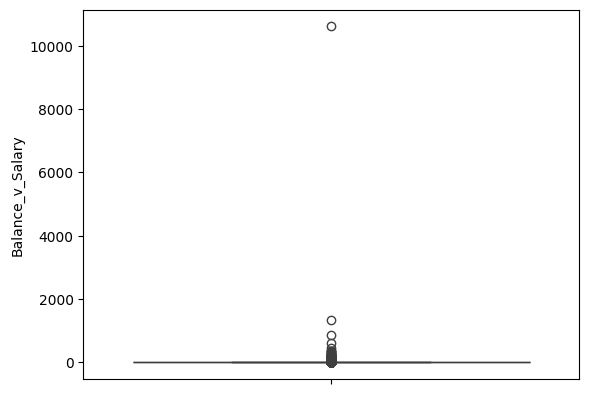

In [88]:
sns.boxplot(data=modeling_df,y="Balance_v_Salary")

In [89]:
modeling_df.describe()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,Balance_v_Salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506,3.878703
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401,108.337260
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000,0.000000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500,0.747002
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500,1.514022
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000,10614.655440


<Axes: ylabel='Balance_v_Salary'>

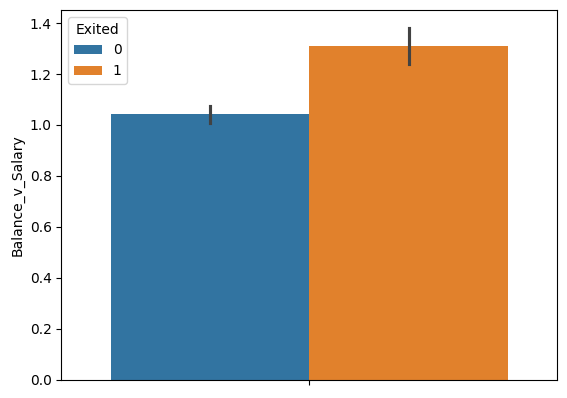

In [90]:
sns.barplot(data=modeling_df.query("Balance_v_Salary < 10"),y="Balance_v_Salary", hue="Exited")

In [91]:
modeling_df["Income_v_Products"] = modeling_df["EstimatedSalary"]/modeling_df["NumOfProducts"]
modeling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,Balance_v_Salary,Income_v_Products
0,0.00,1,2,1,619,42.0,101348.88,True,True,False,False,False,0.000000,101348.880
1,83807.86,1,1,0,608,41.0,112542.58,True,True,False,True,False,0.744677,112542.580
2,159660.80,3,8,1,502,42.0,113931.57,False,False,False,False,False,1.401375,37977.190
3,0.00,2,1,0,699,39.0,93826.63,False,False,False,False,False,0.000000,46913.315
4,125510.82,1,2,0,850,43.0,79084.10,True,True,False,True,False,1.587055,79084.100


In [92]:
modeling_df.describe()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,Balance_v_Salary,Income_v_Products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506,3.878703,74717.170627
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401,108.337260,52059.497823
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000,0.000000,11.580000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000,0.000000,32589.780000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500,0.747002,65908.002500
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500,1.514022,100943.797500
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000,10614.655440,199970.740000


<Axes: xlabel='Exited', ylabel='Income_v_Products'>

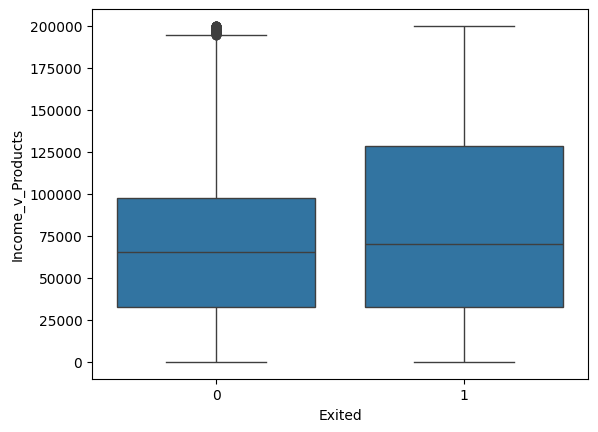

In [93]:
sns.boxplot(data=modeling_df,x="Exited",y="Income_v_Products")

In [94]:
modeling_df.to_csv("Bank Customer Churn Data/Prepared Data/obj5_bank_churn_df.csv")
modeling_df.describe()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,Balance_v_Salary,Income_v_Products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506,3.878703,74717.170627
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401,108.337260,52059.497823
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000,0.000000,11.580000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000,0.000000,32589.780000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500,0.747002,65908.002500
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500,1.514022,100943.797500
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000,10614.655440,199970.740000
